In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import pyreadstat


In [2]:
import seaborn as sns

In [3]:
ls

 磁碟區 C 中的磁碟是 OS
 磁碟區序號:  4071-00CA

 C:\Users\Michael\Desktop\新增資料夾 的目錄

2020/01/06  上午 01:20    <DIR>          .
2020/01/06  上午 01:20    <DIR>          ..
2020/01/06  上午 01:08    <DIR>          .ipynb_checkpoints
2017/10/06  下午 04:59         5,244,246 tscs2016q1.sav
2020/01/06  上午 01:08           155,571 家社期末考(改)2.ipynb
               2 個檔案       5,399,817 位元組
               3 個目錄  460,538,359,808 位元組可用


In [4]:
df, meta = pyreadstat.read_sav('tscs2016q1.sav')
df.head(5)

,id,zip,stratum2,region,stratum2014,region2014,r_stratum2014,psu,ssu,wsel0,...,k7e,k8,kk8,k9,k10,k11a,k11b,k11c,edt1,edt2
0,103301.0,103.0,1.0,1.0,1.0,1.0,11.0,1.0,1.0,0.822111,...,99997.0,1.0,,5.0,11.0,3.0,3.0,3.0,20160913.0,2121.0
1,103303.0,103.0,1.0,1.0,1.0,1.0,11.0,1.0,1.0,0.822111,...,66.0,1.0,,98.0,98.0,4.0,4.0,4.0,20160922.0,1907.0
2,103304.0,103.0,1.0,1.0,1.0,1.0,11.0,1.0,1.0,0.822111,...,99996.0,NaN,,6.0,97.0,4.0,3.0,4.0,20160827.0,1454.0
3,103316.0,103.0,1.0,1.0,1.0,1.0,11.0,1.0,1.0,0.822111,...,99997.0,9.0,,11.0,97.0,3.0,4.0,3.0,20160903.0,2144.0
4,103320.0,103.0,1.0,1.0,1.0,1.0,11.0,1.0,1.0,0.822111,...,99997.0,1.0,,4.0,8.0,3.0,4.0,1.0,20160904.0,1917.0


In [5]:
#df['d1a']

In [6]:
score={1.0:5,2.0:4,3.0:3,4.0:2,5:1,97:97,98:98}

In [7]:
df['性別意識加權']=df['d1a'].map(score)+df['d1b'].map(score)+df['d1e'].map(score)

In [8]:
no_single=df[df['a5'].isin([1,2,5])]
no_single=no_single[no_single['k6'].isin([1,2,3,4,5])]
no_single=no_single[no_single['k8'].isin([1,2,3,4,5])]

In [9]:
len(no_single)

620

In [10]:
pd.value_counts(no_single["k6"])

1.0    521
5.0     36
4.0     35
2.0     18
3.0     10
Name: k6, dtype: int64

In [11]:
no_single=no_single[no_single['d4a'].notna()&no_single['d4a'].isin([1,2,3,4,5,6,7])]
no_single=no_single[no_single['d5a'].notna()&no_single['d5a'].isin([1,2,3,4,5,6,7])]
no_single=no_single[no_single['k5c']<995]
no_single=no_single[no_single['k7c']<995]
no_single=no_single[no_single['d2a'].notna()&no_single['d2a'].isin([1,2,3,4,5,8])]
no_single.loc[no_single['d2a']==8,"d2a"]=3
score2={1:10,2:7,3:4,4:2,5:1,6:1,7:1}
no_single['d4a']=no_single['d4a'].map(score2)
no_single['d4b']=no_single['d4b'].map(score2)
no_single['d4c']=no_single['d4c'].map(score2)
no_single['d5a']=no_single['d5a'].map(score2)
no_single['d5b']=no_single['d5b'].map(score2)
no_single['d5c']=no_single['d5c'].map(score2)

In [12]:
#no_single['性別意識加權']
#no_single=no_single[no_single['d2a'].notna()&no_single['d2a'].isin([1,2,3,4,5,8])]
#no_single[no_single['d2a']==8]=3

In [13]:
len(no_single['性別意識加權'])

512

In [14]:
con=pd.value_counts(no_single['性別意識加權'])

In [15]:
con.index[con.index<16]

Int64Index([10, 8, 6, 12, 9, 7, 11, 5, 4, 13, 14, 3], dtype='int64')

In [16]:
con2=con[sorted(con.index[con.index<16])]

In [17]:
con2=pd.DataFrame(con2)

In [18]:
con2

,性別意識加權
3,2
4,18
5,21
6,77
7,39
8,96
9,48
10,102
11,36
12,51


In [19]:
con2['性別意識加權(%)']=con2['性別意識加權']/sum(con2['性別意識加權'])*100

In [20]:
K=con2['性別意識加權(%)'].array[0]
K1=con2['性別意識加權(%)'].array[0]
for i in range(len(con2)-1):
    K+=con2['性別意識加權(%)'].array[i+1]
    K1=np.append(K1,K)
con2['性別意識加權累積(%)']=K1

In [21]:
con2

,性別意識加權,性別意識加權(%),性別意識加權累積(%)
3,2,0.396040,0.396040
4,18,3.564356,3.960396
5,21,4.158416,8.118812
6,77,15.247525,23.366337
7,39,7.722772,31.089109
8,96,19.009901,50.099010
9,48,9.504950,59.603960
10,102,20.198020,79.801980
11,36,7.128713,86.930693
12,51,10.099010,97.029703


In [22]:
#no_single

In [23]:
boy=no_single[no_single["a1"]==1]
girl=no_single[no_single["a1"]==2]

In [24]:
n1=np.arange(3,7,1)
n2=np.arange(7,11,1)
n3=np.arange(11,16,1)


In [25]:
equal=no_single[no_single['性別意識加權'].isin(n1)]
transitional=no_single[no_single['性別意識加權'].isin(n2)]
tranditional=no_single[no_single['性別意識加權'].isin(n3)]
equal_boy=boy[boy['性別意識加權'].isin(n1)]
equal_girl=girl[girl['性別意識加權'].isin(n1)]
transitional_boy=boy[boy['性別意識加權'].isin(n2)]
transitional_girl=girl[girl['性別意識加權'].isin(n2)]
tranditional_boy=boy[boy['性別意識加權'].isin(n3)]
tranditional_girl=girl[girl['性別意識加權'].isin(n3)]

In [26]:
pd.value_counts(no_single["a1"])

2.0    269
1.0    243
Name: a1, dtype: int64

# 分析: 子女教育 (右尾為配偶做比較多)

In [194]:
equal_edu=equal['d2a']
equal_boy_edu=equal_boy['d2a']
equal_girl_edu=equal_girl['d2a']
transitional_edu=transitional['d2a']
transitional_boy_edu=transitional_boy['d2a']
transitional_girl_edu=transitional_girl['d2a']
tranditional_edu=tranditional['d2a']
tranditional_boy_edu=tranditional_boy['d2a']
tranditional_girl_edu=tranditional_girl['d2a']
boy_edu=boy['d2a']
girl_edu=girl['d2a']

In [28]:
ccc=pd.DataFrame([["男",len(equal_boy),len(transitional_boy),len(tranditional_boy)],["女",len(equal_girl),len(transitional_girl),len(tranditional_girl)],["總計",len(equal),len(transitional),len(tranditional)]],columns=["類別","平等型","過渡型","傳統型"])

In [29]:
ccc

,類別,平等型,過渡型,傳統型
0,男,50,134,52
1,女,68,151,50
2,總計,118,285,102


equal_edu=equal_edu[equal_edu.notna()&equal_edu.isin([1,2,3,4,5,8])]
transitional_edu=transitional_edu[transitional_edu.notna()&transitional_edu.isin([1,2,3,4,5,8])]
tranditional_edu=tranditional_edu[tranditional_edu.notna()&tranditional_edu.isin([1,2,3,4,5,8])]

equal_edu[equal_edu==8]=3
transitional_edu[transitional_edu==8]=3
tranditional_edu[tranditional_edu==8]=3

In [30]:
from scipy.stats import t

In [31]:
import scipy as sp
import statsmodels.api as sm
import researchpy as rp
from statsmodels.formula.api import ols
import statsmodels.stats

# 三種類型 anova

In [32]:
k=np.append(equal_edu,transitional_edu)
dic1={"分數":np.append(k,tranditional_edu),"類型":["平等"]*len(equal_edu)+["過度"]*len(transitional_edu)+["傳統"]*len(tranditional_edu)}
edu=pd.DataFrame(dic1)

In [33]:
results = ols('分數 ~ C(類型)', data=edu).fit()

In [34]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     分數   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.004
Method:                 Least Squares   F-statistic:                   0.02637
Date:                Mon, 06 Jan 2020   Prob (F-statistic):              0.974
Time:                        01:22:25   Log-Likelihood:                -707.66
No. Observations:                 505   AIC:                             1421.
Df Residuals:                     502   BIC:                             1434.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       2.7353      0.098     28.033      0.000       2.544       2.927
C(類型)[T.平等]     0.0189      0.133      0.142      0.887      -0.243       0.281
C(類型)[T.過度]     0.0261      0.114      0.230      0.818      -0.197       0.250
==============================================================================
Omnibus:                        1.791   Durbin-Watson:                   1.891
Prob(Omnibus):                  0.408   Jarque-Bera (JB):                1.722
Skew:                          -0.006   Prob(JB):                        0.423
Kurtosis:                       3.286   Cond. No.                         4.92
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [35]:
aov_table = statsmodels.stats.anova.anova_lm(results, typ=2)
print(aov_table)

              sum_sq     df         F    PR(>F)
C(類型)       0.051214    2.0  0.026369  0.973977
Residual  487.501261  502.0       NaN       NaN


# 平等型

In [36]:
sp.stats.ttest_ind(equal_edu,np.array([3]*len(equal_edu)))#平等

Ttest_indResult(statistic=-2.806451612903223, pvalue=0.005430980302833833)

### 平等男

In [37]:
sp.stats.ttest_ind(equal_boy_edu,np.array([3]*len(equal_boy_edu)))

Ttest_indResult(statistic=0.3057964198313636, pvalue=0.7604082913213759)

### 平等女

In [38]:
sp.stats.ttest_ind(equal_girl_edu,np.array([3]*len(equal_girl_edu)))

Ttest_indResult(statistic=-4.080487099314886, pvalue=7.676012147613569e-05)

# 過渡型

In [39]:
sp.stats.ttest_ind(transitional_edu,np.array([3]*len(transitional_edu)))#過渡

Ttest_indResult(statistic=-4.087595014080382, pvalue=4.987266831587324e-05)

### 過渡男

In [40]:
sp.stats.ttest_ind(transitional_boy_edu,np.array([3]*len(transitional_boy_edu)))

Ttest_indResult(statistic=0.08638926626137315, pvalue=0.931221971426505)

### 過渡女

In [41]:
sp.stats.ttest_ind(transitional_girl_edu,np.array([3]*len(transitional_girl_edu)))

Ttest_indResult(statistic=-6.091186757088117, pvalue=3.428761032438266e-09)

# 傳統型

In [42]:
sp.stats.ttest_ind(tranditional_edu,np.array([3]*len(tranditional_edu)))

Ttest_indResult(statistic=-2.611396997047333, pvalue=0.009694012317145232)

### 傳統男

In [43]:
sp.stats.ttest_ind(tranditional_boy_edu,np.array([3]*len(tranditional_boy_edu)))

Ttest_indResult(statistic=-0.13605806383016117, pvalue=0.8920435459425375)

### 傳統女

In [44]:
sp.stats.ttest_ind(tranditional_girl_edu,np.array([3]*len(tranditional_girl_edu)))

Ttest_indResult(statistic=-3.775316152084852, pvalue=0.00027399982498298186)

### 平等女 vs傳統女

In [45]:
sp.stats.ttest_ind(equal_girl_edu,tranditional_girl_edu)

Ttest_indResult(statistic=0.36463195785174524, pvalue=0.7160500418431058)

### 平等男 vs 傳統男

In [46]:
sp.stats.ttest_ind(equal_boy_edu,tranditional_boy_edu)

Ttest_indResult(statistic=0.3069722338778191, pvalue=0.7595028227496243)

### 過度女 vs傳統女

In [47]:
sp.stats.ttest_ind(transitional_girl_edu,tranditional_girl_edu)

Ttest_indResult(statistic=0.4132848846710875, pvalue=0.6798428983025329)

### 過度男 vs 傳統男

In [48]:
sp.stats.ttest_ind(transitional_boy_edu,tranditional_boy_edu)

Ttest_indResult(statistic=0.16251221371551589, pvalue=0.8710808439601196)

# 準備晚餐 (右尾為自己做比較多)

In [49]:
equal_dinner1=equal['d4a']
equal_boy_dinner1=equal_boy['d4a']
equal_girl_dinner1=equal_girl['d4a']
transitional_dinner1=transitional['d4a']
transitional_boy_dinner1=transitional_boy['d4a']
transitional_girl_dinner1=transitional_girl['d4a']
tranditional_dinner1=tranditional['d4a']
tranditional_boy_dinner1=tranditional_boy['d4a']
tranditional_girl_dinner1=tranditional_girl['d4a']
boy_dinner1=boy['d4a']
girl_dinner1=girl['d4a']

In [50]:
equal_dinner2=equal['d5a']
equal_boy_dinner2=equal_boy['d5a']
equal_girl_dinner2=equal_girl['d5a']
transitional_dinner2=transitional['d5a']
transitional_boy_dinner2=transitional_boy['d5a']
transitional_girl_dinner2=transitional_girl['d5a']
tranditional_dinner2=tranditional['d5a']
tranditional_boy_dinner2=tranditional_boy['d5a']
tranditional_girl_dinner2=tranditional_girl['d5a']
boy_dinner2=boy['d5a']
girl_dinner2=girl['d5a']

# Anova

In [51]:
K=np.append(equal_dinner1/equal_dinner2,transitional_dinner1/transitional_dinner2)
dic={'分數':np.append(K,tranditional_dinner1/tranditional_dinner2),'類型':["平等"]*len(equal_dinner1)+["過度"]*len(transitional_dinner1)+["傳統"]*len(tranditional_dinner1)}
dinner=pd.DataFrame(dic)

In [52]:
results = ols('分數 ~ C(類型)', data=dinner).fit()

In [53]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     分數   R-squared:                       0.006
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     1.499
Date:                Mon, 06 Jan 2020   Prob (F-statistic):              0.224
Time:                        01:22:25   Log-Likelihood:                -1373.4
No. Observations:                 505   AIC:                             2753.
Df Residuals:                     502   BIC:                             2766.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       3.7097      0.365     10.173      0.000       2.993       4.426
C(類型)[T.平等]    -0.6987      0.498     -1.403      0.161      -1.677       0.280
C(類型)[T.過度]    -0.7101      0.425     -1.671      0.095      -1.545       0.125
==============================================================================
Omnibus:                       83.758   Durbin-Watson:                   2.014
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               92.305
Skew:                           0.990   Prob(JB):                     9.04e-21
Kurtosis:                       2.317   Cond. No.                         4.92
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [54]:
aov_table = statsmodels.stats.anova.anova_lm(results, typ=2)
print(aov_table)

               sum_sq     df         F    PR(>F)
C(類型)       40.673752    2.0  1.499352  0.224273
Residual  6809.017367  502.0       NaN       NaN


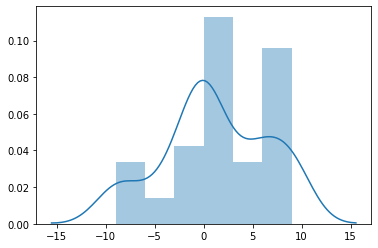

In [55]:
sns.distplot(equal_dinner1-equal_dinner2)

# 平等型

#### f test 

In [56]:
from scipy.stats import f

In [57]:
F = np.var(equal_dinner1) / np.var(equal_dinner2)
df1 = len(equal_dinner1) - 1
df2 = len(equal_dinner1) - 1
p_value = 1 - 2 * abs(0.5 - f.cdf(F, df1, df2))
print(p_value)

0.9740729798946852


#### t.test

In [58]:
sp.stats.ttest_ind(equal_dinner1,equal_dinner2,equal_var=True)

Ttest_indResult(statistic=2.3972753977180057, pvalue=0.01730277960741164)

### 平等男

#### f test

In [59]:
F = np.var(equal_boy_dinner1) / np.var(equal_boy_dinner2)
df1 = len(equal_boy_dinner1) - 1
df2 = len(equal_boy_dinner2) - 1
p_value = 1 - 2 * abs(0.5 - f.cdf(F, df1, df2))
print(p_value)

0.9072093003519329


#### t.test

In [60]:
sp.stats.ttest_ind(equal_boy_dinner1,equal_boy_dinner2,equal_var=True)

Ttest_indResult(statistic=-2.1214279934005624, pvalue=0.036408474679655654)

In [61]:
np.mean(equal_boy_dinner2)

5.96

### 平等女

#### f test

In [62]:
F = np.var(equal_girl_dinner1) / np.var(equal_girl_dinner2)
df1 = len(equal_girl_dinner1) - 1
df2 = len(equal_girl_dinner2) - 1
p_value = 1 - 2 * abs(0.5 - f.cdf(F, df1, df2))
print(p_value)

0.4472715368505702


#### t.test

In [63]:
sp.stats.ttest_ind(equal_girl_dinner1,equal_girl_dinner2,equal_var=True)

Ttest_indResult(statistic=5.278996800222083, pvalue=5.101182348597092e-07)

# 過渡型

#### f test

In [64]:
F = np.var(transitional_dinner1) / np.var(transitional_dinner2)
df1 = len(transitional_dinner1) - 1
df2 = len(transitional_dinner2) - 1
p_value = 1 - 2 * abs(0.5 - f.cdf(F, df1, df2))
print(p_value)

0.7095633555315541


#### t test

In [65]:
sp.stats.ttest_ind(transitional_dinner1,transitional_dinner2,equal_var=True)

Ttest_indResult(statistic=1.1991277541720273, pvalue=0.23097827479118338)

### 過渡型男

#### f test

In [66]:
F = np.var(transitional_boy_dinner1) / np.var(transitional_boy_dinner2)
df1 = len(transitional_boy_dinner1) - 1
df2 = len(transitional_boy_dinner2) - 1
p_value = 1 - 2 * abs(0.5 - f.cdf(F, df1, df2))
print(p_value)

0.5122982230788026


#### t test

In [67]:
sp.stats.ttest_ind(transitional_boy_dinner1,transitional_boy_dinner2,equal_var=True)

Ttest_indResult(statistic=-9.034177868562113, pvalue=3.479765629548002e-17)

### 過渡型女

#### f test

In [68]:
F = np.var(transitional_girl_dinner1) / np.var(transitional_girl_dinner2)
df1 = len(transitional_girl_dinner1) - 1
df2 = len(transitional_girl_dinner2) - 1
p_value = 1 - 2 * abs(0.5 - f.cdf(F, df1, df2))
print(p_value)

0.049635559634957804


#### t test

In [69]:
sp.stats.ttest_ind(transitional_girl_dinner1,transitional_girl_dinner2,equal_var=True)

Ttest_indResult(statistic=10.449285796373026, pvalue=5.319234731124507e-22)

# 傳統型

#### f test

In [70]:
F = np.var(tranditional_dinner1) / np.var(tranditional_dinner2)
df1 = len(tranditional_dinner1) - 1
df2 = len(tranditional_dinner2) - 1
p_value = 1 - 2 * abs(0.5 - f.cdf(F, df1, df2))
print(p_value)

0.7276200347851955


#### t test

In [71]:
sp.stats.ttest_ind(tranditional_dinner1,tranditional_dinner2,equal_var=True)

Ttest_indResult(statistic=2.7671249954530794, pvalue=0.0061805189399268875)

### 傳統型男

#### f test

In [72]:
F = np.var(tranditional_boy_dinner1) / np.var(tranditional_boy_dinner2)
df1 = len(tranditional_boy_dinner1) - 1
df2 = len(tranditional_boy_dinner2) - 1
p_value = 1 - 2 * abs(0.5 - f.cdf(F, df1, df2))
print(p_value)

0.2728797162863963


#### t test

In [73]:
sp.stats.ttest_ind(tranditional_boy_dinner1,tranditional_boy_dinner2,equal_var=True)

Ttest_indResult(statistic=-3.6001137461995123, pvalue=0.0004929818049268967)

### 傳統型女

#### f test

In [74]:
F = np.var(tranditional_girl_dinner1) / np.var(tranditional_girl_dinner2)
df1 = len(tranditional_girl_dinner1) - 1
df2 = len(tranditional_girl_dinner2) - 1
p_value = 1 - 2 * abs(0.5 - f.cdf(F, df1, df2))
print(p_value)

0.05938072341955292


#### t test

In [75]:
sp.stats.ttest_ind(tranditional_girl_dinner1,tranditional_girl_dinner2,equal_var=True)

Ttest_indResult(statistic=9.604754202407905, pvalue=8.728115659455243e-16)

### 平等女vs傳統女 

In [76]:
a=equal_girl_dinner1-equal_girl_dinner2
b=tranditional_girl_dinner1-tranditional_girl_dinner2
F = np.var(a) / np.var(b)
df1 = len(a) - 1
df2 = len(b) - 1
p_value = 1 - 2 * abs(0.5 - f.cdf(F, df1, df2))
print(p_value)

0.524245570059191


In [77]:
sp.stats.ttest_ind(a,b,equal_var=True)

Ttest_indResult(statistic=-2.9834309676701287, pvalue=0.0034757150778620227)

### 平等男v.s傳統男

In [78]:
a=abs(equal_boy_dinner1-equal_boy_dinner2)
b=abs(tranditional_boy_dinner1-tranditional_boy_dinner2)
F = np.var(a) / np.var(b)
df1 = len(a) - 1
df2 = len(b) - 1
p_value = 1 - 2 * abs(0.5 - f.cdf(F, df1, df2))
print(p_value)

0.7753879419142526


In [79]:
sp.stats.ttest_ind(a,b,equal_var=True)

Ttest_indResult(statistic=-0.8811381099008383, pvalue=0.3803559778809048)

In [80]:
np.mean(b)

4.423076923076923

### 過度女 vs傳統女

In [81]:
a=transitional_girl_dinner1-transitional_girl_dinner2
b=tranditional_girl_dinner1-tranditional_girl_dinner2
F = np.var(a) / np.var(b)
df1 = len(a) - 1
df2 = len(b) - 1
p_value = 1 - 2 * abs(0.5 - f.cdf(F, df1, df2))
print(p_value)

0.7661518375208416


In [82]:
sp.stats.ttest_ind(a,b,equal_var=True)

Ttest_indResult(statistic=-2.423237308593639, pvalue=0.01627771993334314)

### 過度男 vs傳統男

In [83]:
a=transitional_boy_dinner1-transitional_boy_dinner2
b=tranditional_boy_dinner1-tranditional_boy_dinner2
F = np.var(transitional_boy_dinner1-transitional_boy_dinner2) / np.var(tranditional_boy_dinner1-tranditional_boy_dinner2)
df1 = len(transitional_boy_dinner1-transitional_boy_dinner2) - 1
df2 = len(tranditional_boy_dinner1-tranditional_boy_dinner2) - 1
p_value = 1 - 2 * abs(0.5 - f.cdf(F, df1, df2))
print(p_value)

0.8503781687554


In [84]:
sp.stats.ttest_ind(a,b,equal_var=True)

Ttest_indResult(statistic=-1.2594611164553358, pvalue=0.2094591069004656)

# 洗衣服((右尾為自己做比較多)

In [85]:
equal_laundry1=equal['d4b']
equal_boy_laundry1=equal_boy['d4b']
equal_girl_laundry1=equal_girl['d4b']
transitional_laundry1=transitional['d4b']
transitional_boy_laundry1=transitional_boy['d4b']
transitional_girl_laundry1=transitional_girl['d4b']
tranditional_laundry1=tranditional['d4b']
tranditional_boy_laundry1=tranditional_boy['d4b']
tranditional_girl_laundry1=tranditional_girl['d4b']
boy_laundry1=boy['d4b']
girl_laundry1=girl['d4b']

In [86]:
equal_laundry2=equal['d5b']
equal_boy_laundry2=equal_boy['d5b']
equal_girl_laundry2=equal_girl['d5b']
transitional_laundry2=transitional['d5b']
transitional_boy_laundry2=transitional_boy['d5b']
transitional_girl_laundry2=transitional_girl['d5b']
tranditional_laundry2=tranditional['d5b']
tranditional_boy_laundry2=tranditional_boy['d5b']
tranditional_girl_laundry2=tranditional_girl['d5b']
boy_laundry2=boy['d5b']
girl_laundry2=girl['d5b']

# Anova

In [87]:
K=np.append(equal_laundry1/equal_laundry2,transitional_laundry1/transitional_laundry2)
dic={'分數':np.append(K,tranditional_laundry1/tranditional_laundry2),'類型':["平等"]*len(equal_laundry1)+["過度"]*len(transitional_laundry1)+["傳統"]*len(tranditional_laundry1)}
laundry=pd.DataFrame(dic)

In [88]:
results = ols('分數 ~ C(類型)', data=laundry).fit()

In [89]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     分數   R-squared:                       0.004
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     1.008
Date:                Mon, 06 Jan 2020   Prob (F-statistic):              0.366
Time:                        01:22:26   Log-Likelihood:                -1408.7
No. Observations:                 505   AIC:                             2823.
Df Residuals:                     502   BIC:                             2836.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       3.9072      0.391      9.993      0.000       3.139       4.675
C(類型)[T.平等]    -0.6216      0.534     -1.164      0.245      -1.670       0.427
C(類型)[T.過度]    -0.6216      0.456     -1.364      0.173      -1.517       0.274
==============================================================================
Omnibus:                      173.643   Durbin-Watson:                   2.033
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               82.458
Skew:                           0.841   Prob(JB):                     1.24e-18
Kurtosis:                       1.956   Cond. No.                         4.92
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [90]:
aov_table = statsmodels.stats.anova.anova_lm(results, typ=2)
print(aov_table)

               sum_sq     df         F    PR(>F)
C(類型)       31.449808    2.0  1.008382  0.365547
Residual  7828.287037  502.0       NaN       NaN


# 平等型

#### f.test

In [91]:
F = np.var(equal_laundry1) / np.var(equal_laundry2)
df1 = len(equal_laundry1) - 1
df2 = len(equal_laundry2) - 1
p_value = 1 - 2 * abs(0.5 - f.cdf(F, df1, df2))
print(p_value)

0.7152893873879727


#### t.test

In [92]:
sp.stats.ttest_ind(equal_laundry1,equal_laundry2,equal_var=True)

Ttest_indResult(statistic=3.0884884655816913, pvalue=0.002254840593012413)

### 平等型男

#### t.test

In [93]:
F = np.var(equal_boy_laundry1) / np.var(equal_boy_laundry2)
df1 = len(equal_boy_laundry1) - 1
df2 = len(equal_boy_laundry2) - 1
p_value = 1 - 2 * abs(0.5 - f.cdf(F, df1, df2))
print(p_value)

0.83724845338667


#### f.test

In [94]:
sp.stats.ttest_ind(equal_boy_laundry1,equal_boy_laundry2,equal_var=True)

Ttest_indResult(statistic=-1.969788447541138, pvalue=0.05168539769737121)

### 平等型女

#### f.test

In [95]:
F = np.var(equal_girl_laundry1) / np.var(equal_girl_laundry2)
df1 = len(equal_girl_laundry1) - 1
df2 = len(equal_girl_laundry2) - 1
p_value = 1 - 2 * abs(0.5 - f.cdf(F, df1, df2))
print(p_value)

0.23281276547203322


#### t.test

In [96]:
sp.stats.ttest_ind(equal_girl_laundry1,equal_girl_laundry2,equal_var=True)

Ttest_indResult(statistic=6.224982940049746, pvalue=5.763234839064836e-09)

# 過渡型

#### f.test

In [97]:
F = np.var(transitional_laundry1) / np.var(transitional_laundry2)
df1 = len(transitional_laundry1) - 1
df2 = len(transitional_laundry2) - 1
p_value = 1 - 2 * abs(0.5 - f.cdf(F, df1, df2))
print(p_value)

0.7836558221865902


#### t.test

In [98]:
sp.stats.ttest_ind(transitional_laundry1,transitional_laundry2,equal_var=True)

Ttest_indResult(statistic=1.418825550961643, pvalue=0.15649835822529906)

#### 過渡型男 

#### f.test

In [99]:
F = np.var(transitional_boy_laundry1) / np.var(transitional_boy_laundry2)
df1 = len(transitional_boy_laundry1) - 1
df2 = len(transitional_boy_laundry2) - 1
p_value = 1 - 2 * abs(0.5 - f.cdf(F, df1, df2))
print(p_value)

0.24061405660839896


#### t.test

In [100]:
sp.stats.ttest_ind(transitional_boy_laundry1,transitional_boy_laundry2,equal_var=False)

Ttest_indResult(statistic=-11.544280091249622, pvalue=3.2267315415876195e-25)

#### 過渡型女

#### f.test

In [101]:
F = np.var(transitional_girl_laundry1) / np.var(transitional_girl_laundry2)
df1 = len(transitional_girl_laundry1) - 1
df2 = len(transitional_girl_laundry2) - 1
p_value = 1 - 2 * abs(0.5 - f.cdf(F, df1, df2))
print(p_value)

0.16807267709991947


#### t.test (變異數我當不等於)

In [102]:
sp.stats.ttest_ind(transitional_girl_laundry1,transitional_girl_laundry2,equal_var=False)

Ttest_indResult(statistic=13.41610277460404, pvalue=2.1660897864130744e-32)

# 傳統型

#### f.test

In [103]:
F = np.var(tranditional_laundry1) / np.var(tranditional_laundry2)
df1 = len(tranditional_laundry1) - 1
df2 = len(tranditional_laundry2) - 1
p_value = 1 - 2 * abs(0.5 - f.cdf(F, df1, df2))
print(p_value)

0.7186999198152861


#### t.test

In [104]:
sp.stats.ttest_ind(tranditional_laundry1,tranditional_laundry2,equal_var=True)

Ttest_indResult(statistic=1.8819152029124484, pvalue=0.06128554791438433)

### 傳統型男

#### f.test

In [105]:
F = np.var(tranditional_boy_laundry1) / np.var(tranditional_boy_laundry2)
df1 = len(tranditional_boy_laundry1) - 1
df2 = len(tranditional_boy_laundry2) - 1
p_value = 1 - 2 * abs(0.5 - f.cdf(F, df1, df2))
print(p_value)

0.030767104953769664


#### t.test

In [106]:
sp.stats.ttest_ind(tranditional_boy_laundry1,tranditional_boy_laundry2,equal_var=True)

Ttest_indResult(statistic=-6.095178896746615, pvalue=1.9647224982707832e-08)

### 傳統型女

#### f.test

In [107]:
F = np.var(tranditional_girl_laundry1) / np.var(tranditional_girl_laundry2)
df1 = len(tranditional_girl_laundry1) - 1
df2 = len(tranditional_girl_laundry2) - 1
p_value = 1 - 2 * abs(0.5 - f.cdf(F, df1, df2))
print(p_value)

0.8671326103509238


#### t.test

In [108]:
sp.stats.ttest_ind(tranditional_girl_laundry1,tranditional_girl_laundry2,equal_var=True)

Ttest_indResult(statistic=11.525956851027505, pvalue=6.154380554424078e-20)

### 平等女vs傳統女

In [109]:
a=equal_girl_laundry1/equal_girl_laundry2
b=tranditional_girl_laundry1/tranditional_girl_laundry2
F = np.var(a) / np.var(b)
df1 = len(a) - 1
df2 = len(b) - 1
p_value = 1 - 2 * abs(0.5 - f.cdf(F, df1, df2))
print(p_value)

0.8909428166831617


In [110]:
sp.stats.ttest_ind(a,b,equal_var=True)

Ttest_indResult(statistic=-3.078156814925158, pvalue=0.0025997564412213476)

### 平等男 v.s 傳統男

In [111]:
a=equal_boy_laundry1-equal_boy_laundry2
b=tranditional_boy_laundry1-tranditional_boy_laundry2
F = np.var(a) / np.var(b)
df1 = len(a) - 1
df2 = len(b) - 1
p_value = 1 - 2 * abs(0.5 - f.cdf(F, df1, df2))
print(p_value)

0.9394319557564035


In [112]:
sp.stats.ttest_ind(a,b,equal_var=True)

Ttest_indResult(statistic=2.237972962524135, pvalue=0.027440836018919456)

### 過度女vs傳統女

In [113]:
a=transitional_girl_laundry1-transitional_girl_laundry2
b=tranditional_girl_laundry1-tranditional_girl_laundry2
F = np.var(a) / np.var(b)
df1 = len(a) - 1
df2 = len(b) - 1
p_value = 1 - 2 * abs(0.5 - f.cdf(F, df1, df2))
print(p_value)

0.4299872716506874


In [114]:
sp.stats.ttest_ind(a,b,equal_var=True)

Ttest_indResult(statistic=-2.0844282626501194, pvalue=0.038397577776963364)

### 過度男 vs傳統男

In [115]:
a=transitional_boy_laundry1-transitional_boy_laundry2
b=tranditional_boy_laundry1-tranditional_boy_laundry2
F = np.var(a) / np.var(b)
df1 = len(a) - 1
df2 = len(b) - 1
p_value = 1 - 2 * abs(0.5 - f.cdf(F, df1, df2))
print(p_value)

0.22923261828227126


In [116]:
sp.stats.ttest_ind(a,b,equal_var=True)

Ttest_indResult(statistic=-0.35008885705909387, pvalue=0.7266724276183221)

# 打掃家裡

In [117]:
equal_clean1=equal['d4c']
equal_boy_clean1=equal_boy['d4c']
equal_girl_clean1=equal_girl['d4c']
transitional_clean1=transitional['d4c']
transitional_boy_clean1=transitional_boy['d4c']
transitional_girl_clean1=transitional_girl['d4c']
tranditional_clean1=tranditional['d4c']
tranditional_boy_clean1=tranditional_boy['d4c']
tranditional_girl_clean1=tranditional_girl['d4c']
boy_clean1=boy['d4c']
girl_clean1=girl['d4c']

In [118]:
equal_clean2=equal['d5c']
equal_boy_clean2=equal_boy['d5c']
equal_girl_clean2=equal_girl['d5c']
transitional_clean2=transitional['d5c']
transitional_boy_clean2=transitional_boy['d5c']
transitional_girl_clean2=transitional_girl['d5c']
tranditional_clean2=tranditional['d5c']
tranditional_boy_clean2=tranditional_boy['d5c']
tranditional_girl_clean2=tranditional_girl['d5c']
boy_clean2=boy['d5c']
girl_clean2=girl['d5c']

# Anova

In [119]:
K=np.append(equal_clean1/equal_clean2,transitional_clean1/transitional_clean2)
dic={'分數':np.append(K,tranditional_clean1/tranditional_clean2),'類型':["平等"]*len(equal_clean1)+["過度"]*len(transitional_clean1)+["傳統"]*len(tranditional_clean1)}
clean=pd.DataFrame(dic)

In [120]:
results = ols('分數 ~ C(類型)', data=clean).fit()

In [121]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     分數   R-squared:                       0.004
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                    0.9801
Date:                Mon, 06 Jan 2020   Prob (F-statistic):              0.376
Time:                        01:22:26   Log-Likelihood:                -1297.2
No. Observations:                 505   AIC:                             2600.
Df Residuals:                     502   BIC:                             2613.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       3.0796      0.314      9.821      0.000       2.464       3.696
C(類型)[T.平等]    -0.5770      0.428     -1.348      0.178      -1.418       0.264
C(類型)[T.過度]    -0.4174      0.365     -1.142      0.254      -1.135       0.301
==============================================================================
Omnibus:                       92.507   Durbin-Watson:                   2.052
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              143.433
Skew:                           1.294   Prob(JB):                     7.14e-32
Kurtosis:                       3.339   Cond. No.                         4.92
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [122]:
aov_table = statsmodels.stats.anova.anova_lm(results, typ=2)
print(aov_table)

               sum_sq     df         F    PR(>F)
C(類型)       19.662266    2.0  0.980115  0.375985
Residual  5035.358947  502.0       NaN       NaN


# 平等型

#### f.test

In [123]:
F = np.var(equal_clean1) / np.var(equal_clean2)
df1 = len(equal_clean1) - 1
df2 = len(equal_clean2) - 1
p_value = 1 - 2 * abs(0.5 - f.cdf(F, df1, df2))
print(p_value)

0.9755953311010632


#### t.test

In [124]:
sp.stats.ttest_ind(equal_clean1,equal_clean2,equal_var=True)

Ttest_indResult(statistic=3.318235320456107, pvalue=0.0010503667435201917)

### 平等型男

#### f.test

In [125]:
F = np.var(equal_boy_clean1) / np.var(equal_boy_clean2)
df1 = len(equal_boy_clean1) - 1
df2 = len(equal_boy_clean2) - 1
p_value = 1 - 2 * abs(0.5 - f.cdf(F, df1, df2))
print(p_value)

0.7712733679368057


#### t.test

In [126]:
sp.stats.ttest_ind(equal_boy_clean1,equal_boy_clean2,equal_var=True)

Ttest_indResult(statistic=-1.4742015650132114, pvalue=0.14363250277567957)

### 平等型女

#### f.test

In [127]:
F = np.var(equal_girl_clean1) / np.var(equal_girl_clean2)
df1 = len(equal_girl_clean1) - 1
df2 = len(equal_girl_clean2) - 1
p_value = 1 - 2 * abs(0.5 - f.cdf(F, df1, df2))
print(p_value)

0.4509678355367146


#### t.test

In [128]:
sp.stats.ttest_ind(equal_girl_clean1,equal_girl_clean2,equal_var=True)

Ttest_indResult(statistic=6.273494050339124, pvalue=4.531690871260731e-09)

# 過度型

#### f.test

In [129]:
F = np.var(transitional_clean1) / np.var(transitional_clean2)
df1 = len(transitional_clean1) - 1
df2 = len(transitional_clean2) - 1
p_value = 1 - 2 * abs(0.5 - f.cdf(F, df1, df2))
print(p_value)

0.4658737622207699


#### t.test

In [130]:
sp.stats.ttest_ind(transitional_clean1,transitional_clean2,equal_var=True)

Ttest_indResult(statistic=1.4039027934916835, pvalue=0.16089430375219244)

### 過渡型男

#### f.test

In [131]:
F = np.var(transitional_boy_clean1) / np.var(transitional_boy_clean2)
df1 = len(transitional_boy_clean1) - 1
df2 = len(transitional_boy_clean2) - 1
p_value = 1 - 2 * abs(0.5 - f.cdf(F, df1, df2))
print(p_value)

0.8309261746534171


#### t.test

In [132]:
sp.stats.ttest_ind(transitional_boy_clean1,transitional_boy_clean2,equal_var=True)

Ttest_indResult(statistic=-9.788821530492694, pvalue=1.5951483745622313e-19)

### 過渡型女

#### f.test

In [133]:
F = np.var(transitional_girl_clean1) / np.var(transitional_girl_clean2)
df1 = len(transitional_girl_clean1) - 1
df2 = len(transitional_girl_clean2) - 1
p_value = 1 - 2 * abs(0.5 - f.cdf(F, df1, df2))
print(p_value)

0.0756594347477082


#### t.test (我當不等於)

In [134]:
sp.stats.ttest_ind(transitional_girl_clean1,transitional_girl_clean2,equal_var=False)

Ttest_indResult(statistic=11.430086229144056, pvalue=2.8112673044643185e-25)

# 傳統型

#### f.test

In [135]:
F = np.var(tranditional_clean1) / np.var(tranditional_clean2)
df1 = len(tranditional_clean1) - 1
df2 = len(tranditional_clean2) - 1
p_value = 1 - 2 * abs(0.5 - f.cdf(F, df1, df2))
print(p_value)

0.9276791622975991


#### t.test

In [136]:
sp.stats.ttest_ind(tranditional_clean1,tranditional_clean2,equal_var=True)

Ttest_indResult(statistic=1.6521544900065688, pvalue=0.10005660458729684)

### 傳統型男

#### f.test

In [137]:
F = np.var(tranditional_boy_clean1) / np.var(tranditional_boy_clean2)
df1 = len(tranditional_boy_clean1) - 1
df2 = len(tranditional_boy_clean2) - 1
p_value = 1 - 2 * abs(0.5 - f.cdf(F, df1, df2))
print(p_value)

0.903031185566225


#### t.test

In [138]:
sp.stats.ttest_ind(tranditional_boy_clean1,tranditional_boy_clean2,equal_var=True)

Ttest_indResult(statistic=-4.605173267720868, pvalue=1.192729736583378e-05)

### 傳統型女

#### f.test

In [139]:
F = np.var(tranditional_girl_clean1) / np.var(tranditional_girl_clean2)
df1 = len(tranditional_girl_clean1) - 1
df2 = len(tranditional_girl_clean2) - 1
p_value = 1 - 2 * abs(0.5 - f.cdf(F, df1, df2))
print(p_value)

0.013327427998523378


#### t.test

In [140]:
sp.stats.ttest_ind(tranditional_girl_clean1,tranditional_girl_clean2,equal_var=True)

Ttest_indResult(statistic=8.00089068675936, pvalue=2.5258692674769628e-12)

### 平等女vs傳統女

In [141]:
a=equal_girl_clean1-equal_girl_clean2
b=tranditional_girl_clean1-tranditional_girl_clean2
F = np.var(a) / np.var(b)
df1 = len(a) - 1
df2 = len(b) - 1
p_value = 1 - 2 * abs(0.5 - f.cdf(F, df1, df2))
print(p_value)

0.19703605269047508


In [142]:
sp.stats.ttest_ind(a,b,equal_var=True)

Ttest_indResult(statistic=-2.0082849533842, pvalue=0.04693621369250103)

In [143]:
np.mean(a)

2.911764705882353

In [144]:
np.mean(b)

4.4

### 平等男vs傳統男

In [145]:
a=equal_boy_clean1-equal_boy_clean2
b=tranditional_boy_clean1-tranditional_boy_clean2
F = np.var(a) / np.var(b)
df1 = len(a) - 1
df2 = len(b) - 1
p_value = 1 - 2 * abs(0.5 - f.cdf(F, df1, df2))
print(p_value)

0.3554063491983771


In [146]:
sp.stats.ttest_ind(a,b,equal_var=True)

Ttest_indResult(statistic=2.2913728169087566, pvalue=0.02403942185392603)

In [147]:
np.mean(b)

-2.6923076923076925

### 過度女vs傳統女

In [148]:
a=transitional_girl_laundry1-transitional_girl_laundry2
b=tranditional_girl_laundry1-tranditional_girl_laundry2
F = np.var(a) / np.var(b)
df1 = len(a) - 1
df2 = len(b) - 1
p_value = 1 - 2 * abs(0.5 - f.cdf(F, df1, df2))
print(p_value)

0.4299872716506874


In [149]:
sp.stats.ttest_ind(a,b,equal_var=True)

Ttest_indResult(statistic=-2.0844282626501194, pvalue=0.038397577776963364)

### 過度男vs傳統男

In [150]:
a=transitional_boy_laundry1-transitional_boy_laundry2
b=tranditional_boy_laundry1-tranditional_boy_laundry2
F = np.var(a) / np.var(b)
df1 = len(a) - 1
df2 = len(b) - 1
p_value = 1 - 2 * abs(0.5 - f.cdf(F, df1, df2))
print(p_value)

0.22923261828227126


In [151]:
sp.stats.ttest_ind(a,b,equal_var=True)

Ttest_indResult(statistic=-0.35008885705909387, pvalue=0.7266724276183221)

# 工作時間

In [152]:
equal_work1=equal['k5c']
equal_boy_work1=equal_boy['k5c']
equal_girl_work1=equal_girl['k5c']
transitional_work1=transitional['k5c']
transitional_boy_work1=transitional_boy['k5c']
transitional_girl_work1=transitional_girl['k5c']
tranditional_work1=tranditional['k5c']
tranditional_boy_work1=tranditional_boy['k5c']
tranditional_girl_work1=tranditional_girl['k5c']
boy_work1=boy['k5c']
girl_work1=girl['k5c']

In [153]:
equal_work2=equal['k7c']
equal_boy_work2=equal_boy['k7c']
equal_girl_work2=equal_girl['k7c']
transitional_work2=transitional['k7c']
transitional_boy_work2=transitional_boy['k7c']
transitional_girl_work2=transitional_girl['k7c']
tranditional_work2=tranditional['k7c']
tranditional_boy_work2=tranditional_boy['k7c']
tranditional_girl_work2=tranditional_girl['k7c']
boy_work2=boy['k7c']
girl_work2=girl['k7c']

# Anova(為了怕無意義，全部加0.5)

In [154]:
K=np.append((equal_work1+0.5)/(equal_work2+0.5),(transitional_work1+0.5)/(transitional_work2+0.5))
dic={'分數':np.append(K,(tranditional_work1+0.5)/(tranditional_work2+0.5)),'類型':["平等"]*len(equal_work1)+["過度"]*len(transitional_work1)+["傳統"]*len(tranditional_work1)}
work=pd.DataFrame(dic)

In [155]:
results = ols('分數 ~ C(類型)', data=work).fit()

In [156]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     分數   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                 -0.002
Method:                 Least Squares   F-statistic:                    0.5361
Date:                Mon, 06 Jan 2020   Prob (F-statistic):              0.585
Time:                        01:22:27   Log-Likelihood:                -505.29
No. Observations:                 505   AIC:                             1017.
Df Residuals:                     502   BIC:                             1029.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       1.0986      0.065     16.809      0.000       0.970       1.227
C(類型)[T.平等]    -0.0736      0.089     -0.825      0.410      -0.249       0.102
C(類型)[T.過度]    -0.0024      0.076     -0.032      0.975      -0.152       0.147
==============================================================================
Omnibus:                      679.568   Durbin-Watson:                   2.035
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            86718.614
Skew:                           6.893   Prob(JB):                         0.00
Kurtosis:                      65.700   Cond. No.                         4.92
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [157]:
aov_table = statsmodels.stats.anova.anova_lm(results, typ=2)
print(aov_table)

              sum_sq     df         F    PR(>F)
C(類型)       0.467151    2.0  0.536074  0.585375
Residual  218.728838  502.0       NaN       NaN


# 平等型

#### f.test

In [158]:
F = np.var(equal_work1) / np.var(equal_work2)
df1 = len(equal_work1) - 1
df2 = len(equal_work2) - 1
p_value = 1 - 2 * abs(0.5 - f.cdf(F, df1, df2))
print(p_value)

0.2802898519327979


#### t.test

In [159]:
sp.stats.ttest_ind(equal_work1,equal_work2,equal_var=True)

Ttest_indResult(statistic=-0.3726489216649761, pvalue=0.7097470612780247)

### 平等型男

#### f.test

In [160]:
F = np.var(equal_boy_work1) / np.var(equal_boy_work2)
df1 = len(equal_boy_work1) - 1
df2 = len(equal_boy_work2) - 1
p_value = 1 - 2 * abs(0.5 - f.cdf(F, df1, df2))
print(p_value)

0.05523578542094176


#### t.test(當變異數不一樣)

In [161]:
sp.stats.ttest_ind(equal_boy_work1,equal_boy_work2,equal_var=False)

Ttest_indResult(statistic=1.0137548105920042, pvalue=0.3133777632276514)

### 平等型女

#### f.test

In [162]:
F = np.var(equal_girl_work1) / np.var(equal_girl_work2)
df1 = len(equal_girl_work1) - 1
df2 = len(equal_girl_work2) - 1
p_value = 1 - 2 * abs(0.5 - f.cdf(F, df1, df2))
print(p_value)

0.5214050363445291


#### t.test

In [163]:
sp.stats.ttest_ind(equal_girl_work1,equal_girl_work2,equal_var=False)

Ttest_indResult(statistic=-1.563596306600624, pvalue=0.12028552033054021)

# 過渡型

#### f.test

In [164]:
F = np.var(transitional_work1) / np.var(transitional_work2)
df1 = len(transitional_work1) - 1
df2 = len(transitional_work2) - 1
p_value = 1 - 2 * abs(0.5 - f.cdf(F, df1, df2))
print(p_value)

0.1466829322657024


#### t.test

In [165]:
sp.stats.ttest_ind(transitional_work1,transitional_work2,equal_var=True)

Ttest_indResult(statistic=-0.3122420820670368, pvalue=0.7549711440969769)

### 過渡型男

#### f.test

In [166]:
F = np.var(transitional_work1) / np.var(transitional_work2)
df1 = len(transitional_work1) - 1
df2 = len(transitional_work2) - 1
p_value = 1 - 2 * abs(0.5 - f.cdf(F, df1, df2))
print(p_value)

0.1466829322657024


#### t.test

In [167]:
sp.stats.ttest_ind(transitional_boy_work1,transitional_boy_work2,equal_var=True)

Ttest_indResult(statistic=1.7282270368219594, pvalue=0.0851080153802152)

### 國渡型女

#### f.test

In [168]:
F = np.var(transitional_girl_work1) / np.var(transitional_girl_work2)
df1 = len(transitional_girl_work1) - 1
df2 = len(transitional_girl_work2) - 1
p_value = 1 - 2 * abs(0.5 - f.cdf(F, df1, df2))
print(p_value)

0.7405286737521025


#### t.test

In [169]:
sp.stats.ttest_ind(transitional_girl_work1,transitional_girl_work2,equal_var=True)

Ttest_indResult(statistic=-1.9799171043516015, pvalue=0.04862644402291689)

# 傳統型

#### f.test

In [170]:
F = np.var(tranditional_work1) / np.var(tranditional_work2)
df1 = len(tranditional_work1) - 1
df2 = len(tranditional_work2) - 1
p_value = 1 - 2 * abs(0.5 - f.cdf(F, df1, df2))
print(p_value)

0.1781208885358585


#### t.test

In [171]:
sp.stats.ttest_ind(tranditional_work1,tranditional_work2,equal_var=False)

Ttest_indResult(statistic=-0.14664357345162016, pvalue=0.8835622192974623)

### 傳統型男

#### f.test

In [172]:
F = np.var(tranditional_boy_work1) / np.var(tranditional_boy_work2)
df1 = len(tranditional_boy_work1) - 1
df2 = len(tranditional_boy_work2) - 1
p_value = 1 - 2 * abs(0.5 - f.cdf(F, df1, df2))
print(p_value)

0.4587870899834159


#### t.test

In [173]:
sp.stats.ttest_ind(tranditional_boy_work1,tranditional_boy_work2,equal_var=False)

Ttest_indResult(statistic=1.6139163905830418, pvalue=0.1096684466429336)

### 傳統型女

#### f.test

In [174]:
F = np.var(tranditional_girl_work1) / np.var(tranditional_girl_work2)
df1 = len(tranditional_girl_work1) - 1
df2 = len(tranditional_girl_work2) - 1
p_value = 1 - 2 * abs(0.5 - f.cdf(F, df1, df2))
print(p_value)

0.13744244514710724


#### t.test

In [175]:
sp.stats.ttest_ind(tranditional_girl_work1,tranditional_girl_work2,equal_var=False)

Ttest_indResult(statistic=-2.1242067210682936, pvalue=0.036282398297349125)

### 平等女v.s 傳統女

In [176]:
a=(equal_girl_work1)-(equal_girl_work2)
b=(tranditional_girl_work1)-(tranditional_girl_work2)
F = np.var(a) / np.var(b)
df1 = len(a) - 1
df2 = len(b) - 1
p_value = 1 - 2 * abs(0.5 - f.cdf(F, df1, df2))
print(p_value)

0.06394949746035195


In [177]:
sp.stats.ttest_ind(a,b,equal_var=False)

Ttest_indResult(statistic=1.2865983354899293, pvalue=0.20154557365974976)

### 平等男v.s 傳統男

In [178]:
a=(equal_boy_work1)-(equal_boy_work2)
b=(tranditional_boy_work1)-(tranditional_boy_work2)
F = np.var(a) / np.var(b)
df1 = len(a) - 1
df2 = len(b) - 1
p_value = 1 - 2 * abs(0.5 - f.cdf(F, df1, df2))
print(p_value)

0.35843934591198523


In [179]:
sp.stats.ttest_ind(a,b,equal_var=False)

Ttest_indResult(statistic=-0.8682539608449459, pvalue=0.3873513206827053)

In [180]:
np.mean(a)

2.98

In [181]:
np.mean(b)

5.730769230769231

### 過度女v.s 傳統女

In [182]:
a=(transitional_girl_work1)-(transitional_girl_work2)
b=(tranditional_girl_work1)-(tranditional_girl_work2)
F = np.var(a) / np.var(b)
df1 = len(a) - 1
df2 = len(b) - 1
p_value = 1 - 2 * abs(0.5 - f.cdf(F, df1, df2))
print(p_value)

0.982728709701292


In [183]:
sp.stats.ttest_ind(a,b,equal_var=True)

Ttest_indResult(statistic=1.4239622620621615, pvalue=0.1560235052176804)

### 過度男v.s 傳統男

In [184]:
a=transitional_boy_work1-transitional_boy_work2
b=(tranditional_boy_work1)-(tranditional_boy_work2)
F = np.var(a) / np.var(b)
df1 = len(a) - 1
df2 = len(b) - 1
p_value = 1 - 2 * abs(0.5 - f.cdf(F, df1, df2))
print(p_value)

0.31092880829918257


In [185]:
sp.stats.ttest_ind(a,b,equal_var=False)

Ttest_indResult(statistic=-1.0950119186487168, pvalue=0.27664147362847913)

In [186]:
np.mean(a)

2.7761194029850746

In [187]:
np.mean(b)

5.730769230769231

In [188]:
sp.stats.t.cdf(-1.7439439480259065, len(a) + len(b) - 2)

0.041419454647178285

### 過度男 vs 平等男

In [189]:
a=transitional_boy_work1-transitional_boy_work2
b=(equal_boy_work1)-(equal_boy_work2)
F = np.var(a) / np.var(b)
df1 = len(a) - 1
df2 = len(b) - 1
p_value = 1 - 2 * abs(0.5 - f.cdf(F, df1, df2))
print(p_value)

0.9043590095032532


In [190]:
sp.stats.ttest_ind(a,b,equal_var=True)

Ttest_indResult(statistic=-0.08161884350977261, pvalue=0.9350395043295417)

In [191]:
np.mean(a)

2.7761194029850746

In [192]:
np.mean(b)

2.98

# 男女各項家事比對

## 教育

In [195]:
sp.stats.ttest_ind(boy_edu,girl_edu)

Ttest_indResult(statistic=5.823407587005326, pvalue=1.0213379236527573e-08)

## 晚餐

In [204]:
a=boy_dinner1-boy_dinner2
b=girl_dinner1-girl_dinner2
F = np.var(a) / np.var(b)
df1 = len(a) - 1
df2 = len(b) - 1
p_value = 1 - 2 * abs(0.5 - f.cdf(F, df1, df2))
print(p_value)

0.22311948320542174


In [205]:
sp.stats.ttest_ind(a,b)

Ttest_indResult(statistic=-15.625546206285128, pvalue=2.941889165135999e-45)

## 洗衣服

In [210]:
a=boy_laundry1-boy_laundry2
b=girl_laundry1-girl_laundry2
F = np.var(a) / np.var(b)
df1 = len(a) - 1
df2 = len(b) - 1
p_value = 1 - 2 * abs(0.5 - f.cdf(F, df1, df2))
print(p_value)

0.23669926305078803


In [211]:
sp.stats.ttest_ind(a,b)

Ttest_indResult(statistic=-18.092600650591695, pvalue=6.929730400953767e-57)

## 打掃

In [206]:
a=boy_clean1-boy_clean2
b=girl_clean1-girl_clean2
F = np.var(a) / np.var(b)
df1 = len(a) - 1
df2 = len(b) - 1
p_value = 1 - 2 * abs(0.5 - f.cdf(F, df1, df2))
print(p_value)

0.8777568019631157


In [207]:
sp.stats.ttest_ind(a,b)

Ttest_indResult(statistic=-17.448285282645877, pvalue=8.340153418503983e-54)

## 工作

In [208]:
a=boy_work1-boy_work2
b=girl_work1-girl_work2
F = np.var(a) / np.var(b)
df1 = len(a) - 1
df2 = len(b) - 1
p_value = 1 - 2 * abs(0.5 - f.cdf(F, df1, df2))
print(p_value)

0.3862067697767153


In [209]:
sp.stats.ttest_ind(a,b)

Ttest_indResult(statistic=5.566810644296279, pvalue=4.199607841973924e-08)